<a href="https://colab.research.google.com/github/BenjaminDKLuong/Colab_Notes/blob/master/zalora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gender Classification
In this project, my task is predicting if a record is male or female customer.

In [0]:
import json  
import pandas as pd  
from pandas.io.json import json_normalize  

In [0]:
# load the data from data.json file
data = pd.read_json('./data.json',orient='records')

In [43]:
# check for the data,
data

,0
0,"[{""days_since_first_order"":2783,""days_since_la..."


In [0]:
# we load the json data
data2 = json.loads(data.iloc[0,0])
del data

In [45]:
# check for how many records 
len(data2)

191287

In [0]:
df = json_normalize(data2)
del data2

In [47]:
df.head().T

,0,1,2,3,4
days_since_first_order,2783,2772,2773,2767,1430
days_since_last_order,1487,1296,1929,6,826
is_newsletter_subscriber,N,N,N,Y,N
orders,2,1,4,23,2
items,5,1,4,36,6
returns,0,0,0,3,0
different_addresses,0,0,0,0,0
shipping_addresses,2,1,2,3,2
devices,1,1,1,3,1
vouchers,0,0,0,13,0


In [0]:
# Check for datatypes.  We can see all column datatypes are numbers except is_newsletter_subscriber
# We should convert it to 0 and 1.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191287 entries, 0 to 191286
Data columns (total 33 columns):
days_since_first_order      191287 non-null int64
days_since_last_order       191287 non-null int64
is_newsletter_subscriber    191287 non-null object
orders                      191287 non-null int64
items                       191287 non-null int64
returns                     191287 non-null int64
different_addresses         191287 non-null int64
shipping_addresses          191287 non-null int64
devices                     191287 non-null int64
vouchers                    191287 non-null int64
cc_payments                 191287 non-null int64
paypal_payments             191287 non-null int64
afterpay_payments           191287 non-null int64
female_items                191287 non-null int64
male_items                  191287 non-null int64
unisex_items                191287 non-null int64
wapp_items                  191287 non-null int64
wftw_items                  191287 non

# Covert is_newsletter_subscriber column to 0 and 1

In [48]:
# check for unique values in is_newsletter_subscriber column
# we can see this column has "Y" and "N" only, we can safely covert it to 1 and 0
df.is_newsletter_subscriber.unique()

array(['N', 'Y'], dtype=object)

In [0]:
# replace "Y" as 1, and "N" as 0
df.is_newsletter_subscriber=df.is_newsletter_subscriber.replace(to_replace=['N', 'Y'], value=[0, 1])

## Drop duplicates

In [0]:
# drop duplicates if we have any
df.drop_duplicates(inplace=True)

## Check for missing data

In [51]:
# Check if we have missing data
# If we do, we will receive a dataframe with column name and the missing ratio
def checkMissingRatio(all_data):
    all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
    return missing_data
checkMissingRatio(df)

,Missing Ratio


# Check characteristic of all columns

In [52]:
df.iloc[:,:15].describe()


,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,returns,different_addresses,shipping_addresses,devices,vouchers,cc_payments,paypal_payments,afterpay_payments,female_items,male_items
count,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000
mean,2325.415344,862.390832,0.661096,10.841887,24.544668,7.075745,1.258392,2.412438,1.645747,3.394993,13.190337,7.891749,2.942129,19.975942,3.759853
std,382.012579,832.876737,0.473339,19.191299,50.868840,25.923825,8.920020,4.493934,0.734939,7.428651,34.672078,24.887787,13.186908,45.617789,11.935671
min,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2271.000000,92.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,2414.000000,544.000000,1.000000,4.000000,8.000000,1.000000,0.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,5.000000,0.000000
75%,2526.000000,1659.000000,1.000000,12.000000,25.000000,4.000000,0.000000,3.000000,2.000000,4.000000,11.000000,6.000000,0.000000,19.000000,3.000000
max,2813.000000,2329.000000,1.000000,1289.000000,3020.000000,2022.000000,1996.000000,1122.000000,4.000000,1135.000000,2928.000000,1670.000000,615.000000,2150.000000,1115.000000


In [53]:
df.iloc[:,16:].describe()


,wapp_items,wftw_items,mapp_items,wacc_items,macc_items,mftw_items,sprt_items,msite_orders,desktop_orders,android_orders,ios_orders,work_orders,home_orders,parcelpoint_orders,coupon_discount_applied,revenue,customer_id
count,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,1.912870e+05,191287.000000,1.912870e+05
mean,13.846707,3.946588,2.346830,1.745932,0.782965,0.862097,0.238532,2.732941,5.700529,0.227517,2.180901,1.203485,6.038685,0.101471,1.321704e+03,1515.276901,3.387436e+09
std,34.962568,8.023221,8.773565,4.587027,2.343804,2.422466,0.916521,7.253788,11.975780,2.096664,8.206619,5.061593,12.875926,1.425184,3.905356e+04,3508.433432,2.094103e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.559784e+02,-1.130000,3.016870e+09
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000e-03,140.840000,3.202564e+09
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.520000e-02,443.100000,3.398475e+09
75%,12.000000,4.000000,1.000000,2.000000,1.000000,1.000000,0.000000,3.000000,6.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.466000e-01,1477.225000,3.567305e+09
max,1728.000000,493.000000,947.000000,266.000000,206.000000,151.000000,44.000000,373.000000,1275.000000,244.000000,357.000000,223.000000,496.000000,290.000000,5.798000e+06,205655.020000,3.801194e+09




coupon_discount_applied should be in range from 0 to 1. 

We need to check the columns that have a big jump from 75% to max.  For example, we have 0 or some low numbers at 75%.  It means 75% of the data contains that value.  However, the max values of those columns are big number.  We need to check those because we might have outliers or errors:
    

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)


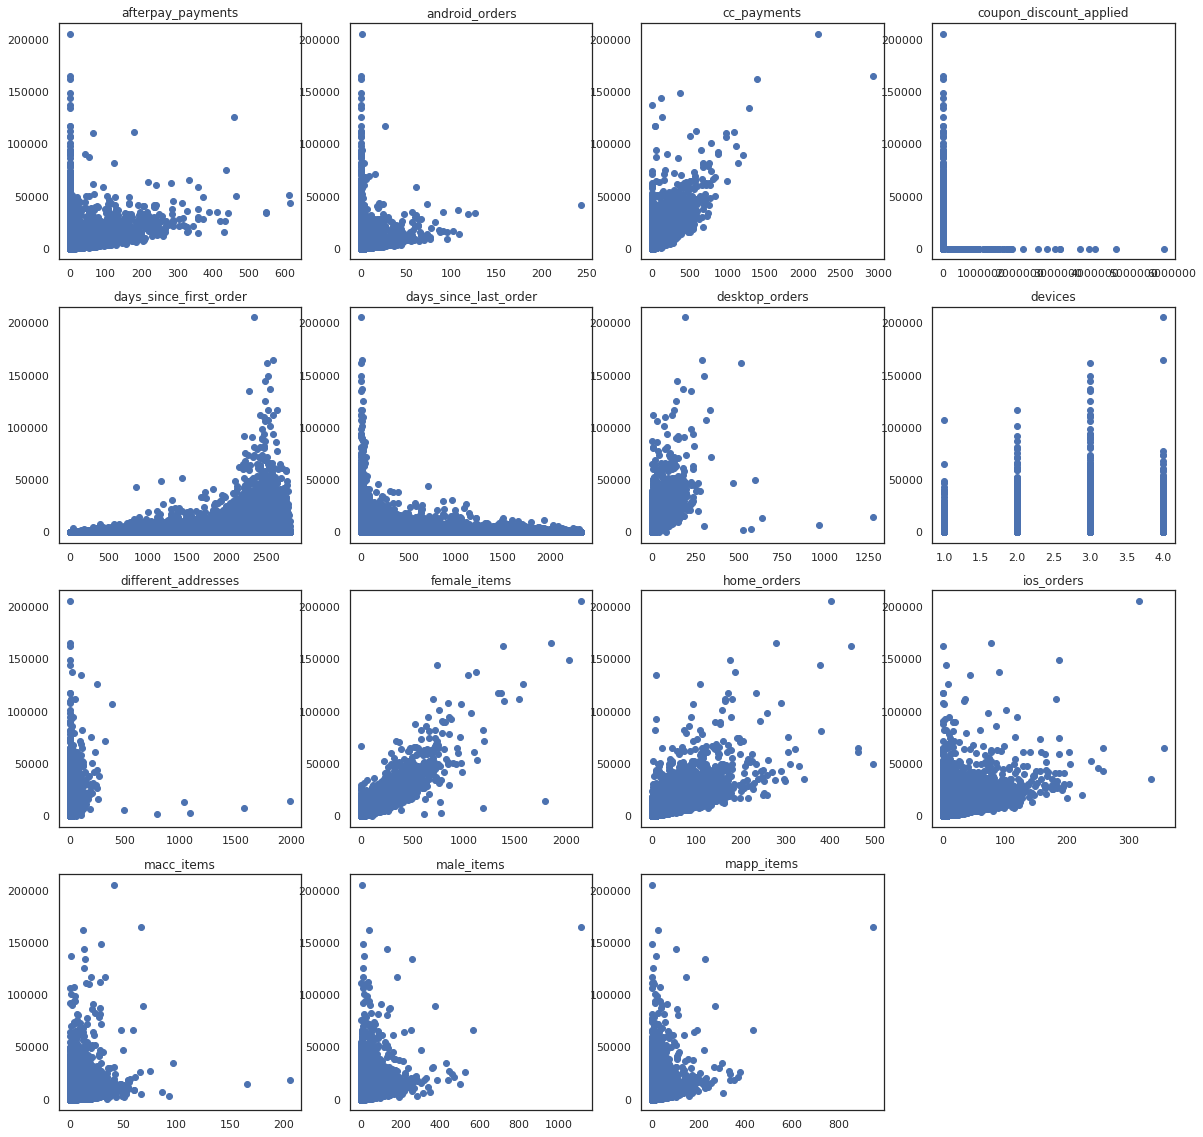

In [0]:
plt.figure(figsize=(20,20))

plt.subplot(4,4, 1)
plt.scatter( df.afterpay_payments,df.revenue)
plt.title('afterpay_payments')
plt.subplot(4,4, 2)
plt.scatter(df.android_orders,df.revenue)
plt.title('android_orders')
plt.subplot(4,4, 3)
plt.scatter( df.cc_payments,df.revenue)
plt.title('cc_payments')
plt.subplot(4,4, 4)
plt.scatter( df.coupon_discount_applied,df.revenue)
plt.title('coupon_discount_applied')
plt.subplot(4,4, 5)
plt.scatter(df.days_since_first_order,df.revenue)
plt.title('days_since_first_order')
plt.subplot(4,4, 6)
plt.scatter( df.days_since_last_order,df.revenue)
plt.title('days_since_last_order')
plt.subplot(4,4, 7)
plt.scatter( df.desktop_orders,df.revenue)
plt.title('desktop_orders')
plt.subplot(4,4, 8)
plt.scatter( df.devices,df.revenue)
plt.title('devices')
plt.subplot(4,4, 9)
plt.scatter( df.different_addresses,df.revenue)
plt.title('different_addresses')
plt.subplot(4,4, 10)
plt.scatter( df.female_items,df.revenue)
plt.title('female_items')
plt.subplot(4,4, 11)
plt.scatter( df.home_orders,df.revenue)
plt.title('home_orders')
plt.subplot(4,4, 12)
plt.scatter( df.ios_orders,df.revenue)
plt.title('ios_orders')
plt.subplot(4,4, 13)
plt.scatter( df.macc_items,df.revenue)
plt.title('macc_items')
plt.subplot(4,4, 14)
plt.scatter( df.male_items,df.revenue)
plt.title('male_items')
plt.subplot(4,4, 15)
plt.scatter( df.mapp_items,df.revenue)
plt.title('mapp_items')
plt.show()

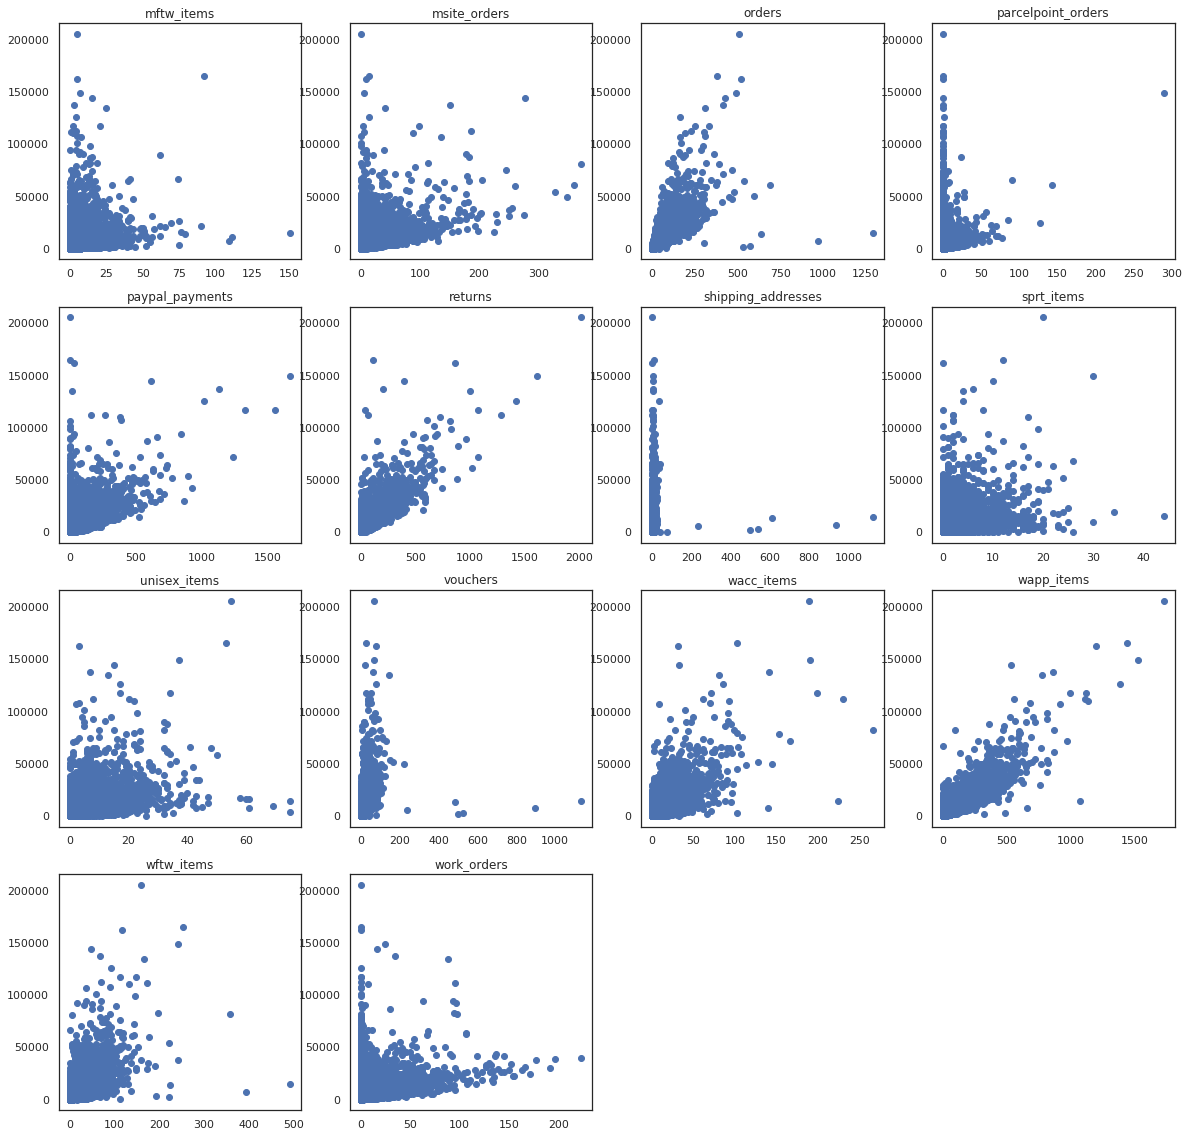

In [0]:
plt.figure(figsize=(20,20))

plt.subplot(4,4, 1)
plt.scatter( df.mftw_items,df.revenue)
plt.title('mftw_items')
plt.subplot(4,4, 2)
plt.scatter( df.msite_orders,df.revenue)
plt.title('msite_orders')
plt.subplot(4,4, 3)
plt.scatter( df.orders,df.revenue)
plt.title('orders')
plt.subplot(4,4, 4)
plt.scatter( df.parcelpoint_orders,df.revenue)
plt.title('parcelpoint_orders')
plt.subplot(4,4, 5)
plt.scatter( df.paypal_payments,df.revenue)
plt.title('paypal_payments')
plt.subplot(4,4, 6)
plt.scatter( df.returns,df.revenue)
plt.title('returns')
plt.subplot(4,4, 7)
plt.scatter( df.shipping_addresses,df.revenue)
plt.title('shipping_addresses')
plt.subplot(4,4, 8)
plt.scatter( df.sprt_items,df.revenue)
plt.title('sprt_items')
plt.subplot(4,4, 9)
plt.scatter( df.unisex_items,df.revenue)
plt.title('unisex_items')
plt.subplot(4,4, 10)
plt.scatter( df.vouchers,df.revenue)
plt.title('vouchers')
plt.subplot(4,4, 11)
plt.scatter( df.wacc_items,df.revenue)
plt.title('wacc_items')
plt.subplot(4,4, 12)
plt.scatter( df.wapp_items,df.revenue)
plt.title('wapp_items')
plt.subplot(4,4, 13)
plt.scatter( df.wftw_items,df.revenue)
plt.title('wftw_items')
plt.subplot(4,4, 14)
plt.scatter( df.work_orders,df.revenue)
plt.title('work_orders')
plt.show()

# My thoughts after looking the graphs and column description
First, coupon_discount_applied should have values between 0 and 1


Second, the shipping_addresses column look suspicious because customers should not use so many shipping_addresses

Third, I dont think we need records where revenue equals zero.

In [54]:
# exclude records that have coupon_discount_applied > 1 and < 0
before = df.shape[0]
df = df[df.coupon_discount_applied <=1]
number_removed_rows = before - df.shape[0]
print('We have removed',number_removed_rows,'rows')

We have removed 1348 rows


In [55]:
before = df.shape[0]
df = df[df.coupon_discount_applied >=0]
number_removed_rows = before - df.shape[0]
print('We have removed',number_removed_rows,'rows')

We have removed 1 rows


In [56]:
# check the shipping_addresses column
import numpy as np
np.sort(df.shipping_addresses.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 35, 38, 42])

In [57]:
df.shipping_addresses.describe()

count    189938.000000
mean          2.400036
std           2.017438
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          42.000000
Name: shipping_addresses, dtype: float64

In [58]:
# we can see that most of customers use under 5 addresses.
# 75% of all customers have 1 to 3 addresses
df.shipping_addresses.value_counts()

1     87541
2     40517
3     23710
4     14414
5      8974
6      5645
7      3403
8      2173
9      1320
10      825
11      496
12      333
13      188
14      119
15       83
16       66
17       49
18       21
19       20
20        9
21        9
22        8
23        4
24        2
25        2
38        1
28        1
29        1
30        1
31        1
35        1
42        1
Name: shipping_addresses, dtype: int64

In [59]:
# I want to remove some records that have so many shipping_addresses because:
# I dont think it's normal to have so many addresses
# and I will create noise in our data
# Let's try 10
before = df.shape[0]
df = df[df.shipping_addresses<=10]
number_removed_rows = before - df.shape[0]
print('We have removed',number_removed_rows,'rows')

We have removed 1416 rows


In [60]:
# Let's remove rows with no revenue
before = df.shape[0]
df = df[df.revenue !=0]
number_removed_rows = before - df.shape[0]
print('We have removed',number_removed_rows,'rows')


We have removed 30 rows


# Apply Unsupervised Learning

In this assignment, we have to predict customer gender based on shopping behavior.
Let's think about what makes female different than male in shopping.
- Female might shop more regularly than male
- Female might return items more than male do
- Female might buy more female related items

I dont think payment methods (afterpay_payments, cc_payments), type of orders (android_orders, desktop_orders, home_orders, ios_orders, parcelpoint_orders, work_orders), and shipping_addresses would affect the gender.


In [0]:
# Here are the columns that I want to work on
# I believe these columns give me enough information about purchase behavior
# I leave out the columns that contain the customer's visit behavior.  I will add these columns later if I need to.
# For now, I think knowing purchase behavior is enough for predicting customers' gender.
ready_df = df[['customer_id','coupon_discount_applied', 'days_since_first_order',
       'days_since_last_order', 'female_items',
       'is_newsletter_subscriber', 'items', 'macc_items', 'male_items',
       'mapp_items', 'mftw_items', 'orders',
       'returns', 'revenue',
       'sprt_items', 'unisex_items', 'vouchers',
       'wacc_items', 'wapp_items', 'wftw_items']]

In [0]:
del df

### Feature Enginerring

1.  I calculate the difference between days_since_first_order and days_since_last_order because I will know the active duration when customers buy items.
2.  In the active duration, I know how many items, returns, and orders for each customer.  Because each customer has different active durations, it would affect the quantity of items, returns, and orders.  In order to put all customers in one measurement, we have to take the ratio between active duration and items, returns, and orders.  Doing this will help us knowing how active of each customer during the duration.  
3.  In order to know purchase behavior, we need to calculate the ratio between columns:
    -  items/orders ratio: we know how many items that customers buy for each order.  Some customers buy many items, the others buy less.
    -  returns/orders ratio:  we know if a customer returns alot compare to the orders.  I believe female likely to return items more than male do.
    -  ratio between all type of items ('macc_items', 'male_items', etc) and items:  We know if customers buy more female related items or male related items.

In [0]:
# copy items columns
ready_df['items_copy'] = np.array(ready_df['items'])


In [0]:
ready_df['active_duration'] = ready_df.days_since_first_order - ready_df.days_since_last_order
# If active_duration equals 0 (customer first order same as last order, like customer just sign up and make purchase today)
# we should convert it to 1
ready_df['active_duration'] = ready_df['active_duration'].map(lambda x: x+1 if x==0 else x)

ready_df['orders_and_duration_ratio'] = ready_df.orders/ready_df.active_duration
ready_df['items_and_duration_ratio'] = ready_df.items_copy/ready_df.active_duration
ready_df['returns_and_duration_ratio'] = ready_df.returns/ready_df.active_duration

ready_df['items_and_orders_ratio'] = ready_df.items_copy/ready_df.orders
ready_df['returns_and_orders_ratio'] = ready_df.returns/ready_df.orders

ready_df['female_items_and_items_ratio'] = ready_df.female_items/ready_df.items_copy
ready_df['macc_items_and_items_ratio'] = ready_df.macc_items/ready_df.items_copy
ready_df['male_items_and_items_ratio'] = ready_df.male_items/ready_df.items_copy
ready_df['mapp_items_and_items_ratio'] = ready_df.mapp_items/ready_df.items_copy
ready_df['mftw_items_and_items_ratio'] = ready_df.mftw_items/ready_df.items_copy
ready_df['sprt_items_and_items_ratio'] = ready_df.sprt_items/ready_df.items_copy
ready_df['unisex_items_and_items_ratio'] = ready_df.unisex_items/ready_df.items_copy
ready_df['wacc_items_and_items_ratio'] = ready_df.wacc_items/ready_df.items_copy
ready_df['wapp_items_and_items_ratio'] = ready_df.wapp_items/ready_df.items_copy
ready_df['wftw_items_and_items_ratio'] = ready_df.wftw_items/ready_df.items_copy



In [0]:
train_df = ready_df[['coupon_discount_applied','is_newsletter_subscriber','active_duration',
                     'revenue','items_copy', 'vouchers',
                     'orders_and_duration_ratio', 'items_and_duration_ratio', 
                     'returns_and_duration_ratio', 'items_and_orders_ratio',
                     'returns_and_orders_ratio', 'female_items_and_items_ratio',
                     'macc_items_and_items_ratio', 'male_items_and_items_ratio',
                     'mapp_items_and_items_ratio', 'mftw_items_and_items_ratio',
                     'sprt_items_and_items_ratio', 'unisex_items_and_items_ratio',
                     'wacc_items_and_items_ratio', 'wapp_items_and_items_ratio',
                     'wftw_items_and_items_ratio']]
                    
customer_id = ready_df[['customer_id']]

In [0]:
del ready_df

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188492 entries, 0 to 191286
Data columns (total 21 columns):
coupon_discount_applied         188492 non-null float64
is_newsletter_subscriber        188492 non-null int64
active_duration                 188492 non-null int64
revenue                         188492 non-null float64
items_copy                      188492 non-null int64
vouchers                        188492 non-null int64
orders_and_duration_ratio       188492 non-null float64
items_and_duration_ratio        188492 non-null float64
returns_and_duration_ratio      188492 non-null float64
items_and_orders_ratio          188492 non-null float64
returns_and_orders_ratio        188492 non-null float64
female_items_and_items_ratio    188492 non-null float64
macc_items_and_items_ratio      188492 non-null float64
male_items_and_items_ratio      188492 non-null float64
mapp_items_and_items_ratio      188492 non-null float64
mftw_items_and_items_ratio      188492 non-null float64
s

In [0]:
train_df.head().T

,0,1,2,3,4
coupon_discount_applied,0.000000,0.009100,0.000000,0.172300,0.003300
is_newsletter_subscriber,0.000000,0.000000,0.000000,1.000000,0.000000
active_duration,1296.000000,1476.000000,844.000000,2761.000000,604.000000
revenue,468.800000,109.090000,448.540000,1872.810000,301.170000
items_copy,5.000000,1.000000,4.000000,36.000000,6.000000
vouchers,0.000000,0.000000,0.000000,13.000000,0.000000
orders_and_duration_ratio,0.001543,0.000678,0.004739,0.008330,0.003311
items_and_duration_ratio,0.003858,0.000678,0.004739,0.013039,0.009934
returns_and_duration_ratio,0.000000,0.000000,0.000000,0.001087,0.000000
items_and_orders_ratio,2.500000,1.000000,1.000000,1.565217,3.000000


### Plotting

In [0]:
sample_data = train_df.sample(frac = 0.2).reset_index(drop=True)

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(sample_data)



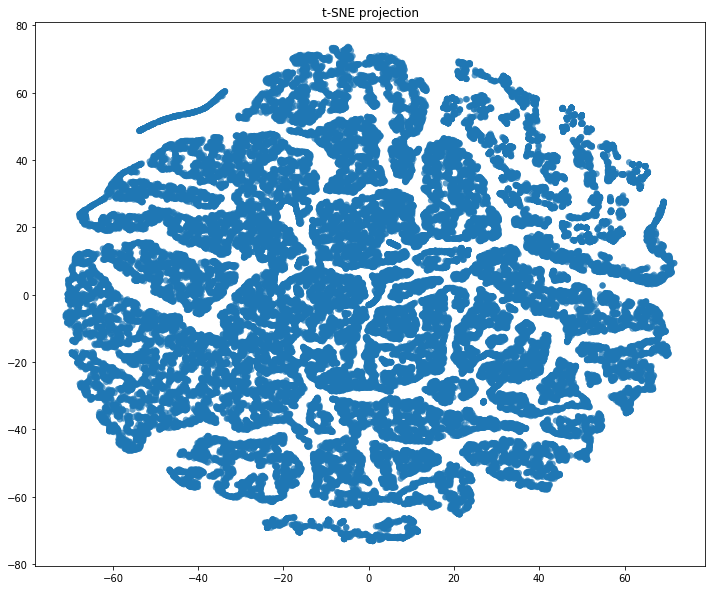

In [0]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
#             c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title('t-SNE projection');

### Training


In [0]:
from sklearn import metrics
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture


model = KMeans(n_clusters=2, random_state=1)
# (SpectralClustering(n_clusters=2, random_state=1,affinity='nearest_neighbors'))
# (AgglomerativeClustering(n_clusters=2,affinity= "euclidean",linkage = "ward"))
# (GaussianMixture(n_components=2))

data = []

model.fit(sample_data)
data.append(({'Silhouette': metrics.silhouette_score(sample_data, model.labels_)}))

results = pd.DataFrame(data=data, columns=['Silhouette'],index=['K-means'])
#                       , index=['K-means', 'Spectral', 'Agglomerative','Gaussian'])

results


,Silhouette
K-means,0.824435


In [0]:
model = (SpectralClustering(n_clusters=2, random_state=1,affinity='nearest_neighbors'))

model.fit(sample_data)
silhouette_score = metrics.silhouette_score(sample_data, model.labels_)

results.loc['Spectral'] = silhouette_score

In [0]:
model = (AgglomerativeClustering(n_clusters=2,affinity= "euclidean",linkage = "ward"))

model.fit(sample_data)
silhouette_score = metrics.silhouette_score(sample_data, model.labels_)

results.loc['Agglomerative'] = silhouette_score

In [0]:
model = (GaussianMixture(n_components=2))

model.fit(sample_data)
silhouette_score = metrics.silhouette_score(sample_data, model.predict(sample_data))

results.loc['Gaussian'] = silhouette_score

In [0]:
results


,Silhouette
K-means,0.824435
Spectral,0.220520
Agglomerative,0.823702
Gaussian,0.006702


In [0]:
# test with female items and male items
sample_male_female_df = sample_data[['female_items_and_items_ratio',
                             'macc_items_and_items_ratio', 'male_items_and_items_ratio',
                             'mapp_items_and_items_ratio', 'mftw_items_and_items_ratio',
                             'sprt_items_and_items_ratio', 'unisex_items_and_items_ratio',
                             'wacc_items_and_items_ratio', 'wapp_items_and_items_ratio',
                             'wftw_items_and_items_ratio']]

In [0]:
model = KMeans(n_clusters=2, random_state=1)

model.fit(sample_male_female_df)
silhouette_score = metrics.silhouette_score(sample_male_female_df, model.labels_)

results.loc['Kmeans_male_female'] = silhouette_score


In [0]:
model = (AgglomerativeClustering(n_clusters=2,affinity= "euclidean",linkage = "ward"))

model.fit(sample_male_female_df)
silhouette_score = metrics.silhouette_score(sample_male_female_df, model.labels_)

results.loc['Agglomerative_male_female'] = silhouette_score

In [0]:
results


,Silhouette
K-means,0.824435
Spectral,0.220520
Agglomerative,0.823702
Gaussian,0.006702
Kmeans_male_female,0.556775
Agglomerative_male_female,0.554843


## Looking that the results above, Kmeans and Agglomerative clustering perform better compare the other two. 

I tried to reduce my columns further, but it did not work.  You can see that the Silhouette score went down. I should use train_df version (not the reduced one). Here are the columns that I should use: 

['coupon_discount_applied', 'is_newsletter_subscriber',
       'active_duration', 'revenue', 'items_copy', 'vouchers',
       'orders_and_duration_ratio', 'items_and_duration_ratio',
       'returns_and_duration_ratio', 'items_and_orders_ratio',
       'returns_and_orders_ratio', 'female_items_and_items_ratio',
       'macc_items_and_items_ratio', 'male_items_and_items_ratio',
       'mapp_items_and_items_ratio', 'mftw_items_and_items_ratio',
       'sprt_items_and_items_ratio', 'unisex_items_and_items_ratio',
       'wacc_items_and_items_ratio', 'wapp_items_and_items_ratio',
       'wftw_items_and_items_ratio']

K-means and Agglomerative Clustering have same performance, but Agglomerative Clustering takes long time to run.  I will choose Kmeans as my main model.

# Full training

In [31]:
from sklearn import metrics
import pandas as pd
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=1)

data = []

model.fit(train_df)
data.append(({'Silhouette': metrics.silhouette_score(train_df, model.labels_)}))

results = pd.DataFrame(data=data, columns=['Silhouette'],index=['K-means'])

results


,Silhouette
K-means,0.821049


In [0]:
train_df['prediction'] = model.labels_

In [74]:
train_df[train_df.prediction ==0].head(25).T

,0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26
coupon_discount_applied,0.000000,0.009100,0.000000,0.172300,0.003300,0.001500,0.073800,0.013700,0.061000,0.168700,0.209000,0.000200,0.048000,0.002400,0.001000,0.004500,0.004100,0.017400,0.113100,0.000000,0.007000,0.010000,0.233000,0.141900,0.032200
is_newsletter_subscriber,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
active_duration,1296.000000,1476.000000,844.000000,2761.000000,604.000000,1334.000000,2752.000000,1336.000000,2369.000000,667.000000,2458.000000,2740.000000,2714.000000,2252.000000,2764.000000,1169.000000,2752.000000,777.000000,2716.000000,574.000000,818.000000,622.000000,1514.000000,1831.000000,2706.000000
revenue,468.800000,109.090000,448.540000,1872.810000,301.170000,628.580000,2625.620000,72.680000,4382.750000,139.940000,438.710000,3576.540000,1944.460000,403.640000,934.410000,218.980000,240.230000,57.230000,778.910000,574.740000,141.810000,99.940000,162.730000,326.290000,5894.460000
items_copy,5.000000,1.000000,4.000000,36.000000,6.000000,11.000000,58.000000,1.000000,69.000000,2.000000,12.000000,41.000000,23.000000,3.000000,8.000000,6.000000,2.000000,2.000000,11.000000,4.000000,1.000000,2.000000,7.000000,4.000000,60.000000
vouchers,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,6.000000,0.000000,7.000000,1.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000
orders_and_duration_ratio,0.001543,0.000678,0.004739,0.008330,0.003311,0.002999,0.007631,0.000749,0.013086,0.001499,0.002441,0.004745,0.007369,0.000888,0.002894,0.000855,0.000727,0.001287,0.002946,0.005226,0.001222,0.001608,0.001982,0.001092,0.006282
items_and_duration_ratio,0.003858,0.000678,0.004739,0.013039,0.009934,0.008246,0.021076,0.000749,0.029126,0.002999,0.004882,0.014964,0.008475,0.001332,0.002894,0.005133,0.000727,0.002574,0.004050,0.006969,0.001222,0.003215,0.004624,0.002185,0.022173
returns_and_duration_ratio,0.000000,0.000000,0.000000,0.001087,0.000000,0.000000,0.001817,0.000000,0.015196,0.002999,0.001627,0.005474,0.002579,0.000444,0.001085,0.000000,0.000363,0.000000,0.000000,0.001742,0.000000,0.000000,0.000000,0.001092,0.004435
items_and_orders_ratio,2.500000,1.000000,1.000000,1.565217,3.000000,2.750000,2.761905,1.000000,2.225806,2.000000,2.000000,3.153846,1.150000,1.500000,1.000000,6.000000,1.000000,2.000000,1.375000,1.333333,1.000000,2.000000,2.333333,2.000000,3.529412


In [75]:
train_df[train_df.prediction ==1].head(25).T

,5,46,50,52,64,68,71,75,76,78,97,122,149,185,186,192,199,223,228,229,235,308,311,328,337
coupon_discount_applied,0.041300,0.104500,0.057700,0.106100,0.077400,0.179400,0.214100,0.169700,0.185800,0.108800,0.048800,0.063800,0.258100,0.083500,0.085800,0.204200,0.044200,0.043100,0.164000,0.073300,0.420900,0.136800,0.221300,0.060700,0.198400
is_newsletter_subscriber,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
active_duration,2746.000000,2547.000000,2735.000000,2717.000000,2711.000000,2718.000000,2194.000000,2481.000000,2685.000000,2780.000000,2663.000000,2719.000000,2197.000000,2607.000000,2007.000000,2648.000000,2675.000000,2695.000000,2050.000000,2756.000000,1494.000000,2630.000000,2661.000000,2520.000000,2387.000000
revenue,7131.310000,7855.170000,10603.590000,11322.940000,16529.390000,8738.090000,9662.280000,11382.950000,17695.230000,8943.180000,14882.340000,8003.660000,7759.040000,10507.580000,9213.640000,10981.280000,22780.670000,11385.750000,17160.080000,49154.630000,8016.550000,37440.160000,8885.900000,9137.440000,8026.570000
items_copy,81.000000,100.000000,123.000000,167.000000,191.000000,178.000000,114.000000,143.000000,316.000000,150.000000,249.000000,87.000000,129.000000,150.000000,92.000000,89.000000,230.000000,145.000000,190.000000,484.000000,91.000000,411.000000,143.000000,187.000000,131.000000
vouchers,9.000000,15.000000,10.000000,14.000000,15.000000,38.000000,33.000000,34.000000,40.000000,23.000000,14.000000,9.000000,76.000000,20.000000,13.000000,30.000000,22.000000,11.000000,50.000000,39.000000,11.000000,106.000000,29.000000,11.000000,30.000000
orders_and_duration_ratio,0.013110,0.016097,0.015722,0.016194,0.029141,0.028330,0.029170,0.041516,0.056611,0.031295,0.031919,0.013976,0.038689,0.036057,0.026906,0.020770,0.047850,0.028200,0.046341,0.054427,0.034806,0.120152,0.025179,0.021825,0.018852
items_and_duration_ratio,0.029497,0.039262,0.044973,0.061465,0.070454,0.065489,0.051960,0.057638,0.117691,0.053957,0.093504,0.031997,0.058716,0.057537,0.045840,0.033610,0.085981,0.053803,0.092683,0.175617,0.060910,0.156274,0.053739,0.074206,0.054881
returns_and_duration_ratio,0.008012,0.004711,0.002194,0.011778,0.000000,0.014717,0.016864,0.030230,0.062942,0.011511,0.014645,0.017286,0.007283,0.002301,0.015944,0.001888,0.044860,0.039332,0.053171,0.043541,0.032129,0.103042,0.024427,0.039286,0.033515
items_and_orders_ratio,2.250000,2.439024,2.860465,3.795455,2.417722,2.311688,1.781250,1.388350,2.078947,1.724138,2.929412,2.289474,1.517647,1.595745,1.703704,1.618182,1.796875,1.907895,2.000000,3.226667,1.750000,1.300633,2.134328,3.400000,2.911111


In [71]:
train_df.prediction.value_counts()

0    181238
1      7254
Name: prediction, dtype: int64

In [73]:
train_df.shape

(188492, 22)

## Look like majority of our predictions are 0.  There are only 7254 records are 1.  It's about 3.84% of our dataset. Something doesnt seem right here. 

Looking at the results above for both 0 and 1, we can see that the model classifies a record as 1 if most of columns have some values.  It means most of the ratios have some values.  In the other words, when customers buy both male and female items (mostly) would be classify as 1.

## Different approach:
I need to find a different way to create my input data.  I would group all male ratios together, and female ratios together.  I want to make it simple at first to see how our results look like.


In [0]:
train_df['male_ratio']= train_df.macc_items_and_items_ratio	+ train_df.male_items_and_items_ratio	+ train_df.mapp_items_and_items_ratio + train_df.mftw_items_and_items_ratio


train_df['female_ratio']= train_df.female_items_and_items_ratio	+ train_df.wacc_items_and_items_ratio	+ train_df.wapp_items_and_items_ratio + train_df.wftw_items_and_items_ratio



In [77]:
input_df = train_df[['male_ratio','female_ratio']]

model = KMeans(n_clusters=2, random_state=1)

data = []

model.fit(input_df)
data.append(({'Silhouette': metrics.silhouette_score(input_df, model.labels_)}))

results = pd.DataFrame(data=data, columns=['Silhouette'],index=['K-means'])

results


,Silhouette
K-means,0.81889


In [0]:
train_df['prediction'] = model.labels_

In [79]:
train_df.prediction.value_counts()

0    147365
1     41127
Name: prediction, dtype: int64

In [80]:
train_df.shape

(188492, 24)

In [81]:
train_df[train_df.prediction ==0].head(25).T

,2,3,5,6,8,9,11,12,13,16,20,21,22,23,24,26,27,28,29,32,35,36,39,40,41
coupon_discount_applied,0.000000,0.172300,0.041300,0.001500,0.013700,0.061000,0.209000,0.000200,0.048000,0.004500,0.113100,0.000000,0.007000,0.010000,0.233000,0.032200,0.063400,0.065800,0.180000,0.058000,0.083100,0.055200,0.171500,0.025500,0.137600
is_newsletter_subscriber,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
active_duration,844.000000,2761.000000,2746.000000,1334.000000,1336.000000,2369.000000,2458.000000,2740.000000,2714.000000,1169.000000,2716.000000,574.000000,818.000000,622.000000,1514.000000,2706.000000,2730.000000,31.000000,2717.000000,2249.000000,2724.000000,2447.000000,2429.000000,2407.000000,2708.000000
revenue,448.540000,1872.810000,7131.310000,628.580000,72.680000,4382.750000,438.710000,3576.540000,1944.460000,218.980000,778.910000,574.740000,141.810000,99.940000,162.730000,5894.460000,6559.710000,234.320000,5247.360000,1188.330000,6348.850000,788.710000,824.970000,427.170000,1944.600000
items_copy,4.000000,36.000000,81.000000,11.000000,1.000000,69.000000,12.000000,41.000000,23.000000,6.000000,11.000000,4.000000,1.000000,2.000000,7.000000,60.000000,78.000000,6.000000,134.000000,24.000000,115.000000,10.000000,15.000000,6.000000,30.000000
vouchers,0.000000,13.000000,9.000000,0.000000,0.000000,7.000000,2.000000,0.000000,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,11.000000,1.000000,28.000000,3.000000,23.000000,1.000000,7.000000,1.000000,8.000000
orders_and_duration_ratio,0.004739,0.008330,0.013110,0.002999,0.000749,0.013086,0.002441,0.004745,0.007369,0.000855,0.002946,0.005226,0.001222,0.001608,0.001982,0.006282,0.017216,0.096774,0.020979,0.005780,0.016520,0.003678,0.004529,0.001662,0.007016
items_and_duration_ratio,0.004739,0.013039,0.029497,0.008246,0.000749,0.029126,0.004882,0.014964,0.008475,0.005133,0.004050,0.006969,0.001222,0.003215,0.004624,0.022173,0.028571,0.193548,0.049319,0.010671,0.042217,0.004087,0.006175,0.002493,0.011078
returns_and_duration_ratio,0.000000,0.001087,0.008012,0.000000,0.000000,0.015196,0.001627,0.005474,0.002579,0.000000,0.000000,0.001742,0.000000,0.000000,0.000000,0.004435,0.008425,0.096774,0.016562,0.001779,0.001836,0.000000,0.000823,0.000415,0.000000
items_and_orders_ratio,1.000000,1.565217,2.250000,2.750000,1.000000,2.225806,2.000000,3.153846,1.150000,6.000000,1.375000,1.333333,1.000000,2.000000,2.333333,3.529412,1.659574,2.000000,2.350877,1.846154,2.555556,1.111111,1.363636,1.500000,1.578947


In [82]:
train_df[train_df.prediction ==1].head(25).T

,0,1,4,7,10,14,15,18,19,25,30,31,33,34,37,38,44,53,54,82,84,86,88,90,98
coupon_discount_applied,0.000000,0.009100,0.003300,0.073800,0.168700,0.002400,0.001000,0.004100,0.017400,0.141900,0.226800,0.036100,0.057200,0.127700,0.073800,0.014100,0.211500,0.126000,0.013700,0.001200,0.019200,0.428500,0.001800,0.200500,0.086400
is_newsletter_subscriber,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
active_duration,1296.000000,1476.000000,604.000000,2752.000000,667.000000,2252.000000,2764.000000,2752.000000,777.000000,1831.000000,2392.000000,1102.000000,2707.000000,2746.000000,1472.000000,728.000000,2142.000000,1835.000000,1650.000000,1816.000000,2582.000000,2179.000000,1658.000000,1698.000000,1367.000000
revenue,468.800000,109.090000,301.170000,2625.620000,139.940000,403.640000,934.410000,240.230000,57.230000,326.290000,1388.540000,251.630000,404.840000,1981.800000,295.380000,70.430000,958.470000,252.120000,72.730000,815.040000,2120.060000,373.460000,542.580000,298.990000,2279.870000
items_copy,5.000000,1.000000,6.000000,58.000000,2.000000,3.000000,8.000000,2.000000,2.000000,4.000000,27.000000,6.000000,6.000000,58.000000,5.000000,3.000000,16.000000,9.000000,1.000000,15.000000,18.000000,9.000000,4.000000,4.000000,49.000000
vouchers,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000,9.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,1.000000,4.000000,0.000000,2.000000,9.000000
orders_and_duration_ratio,0.001543,0.000678,0.003311,0.007631,0.001499,0.000888,0.002894,0.000727,0.001287,0.001092,0.004181,0.001815,0.001847,0.008740,0.002038,0.001374,0.004202,0.002180,0.000606,0.004405,0.005035,0.002295,0.001809,0.002356,0.017557
items_and_duration_ratio,0.003858,0.000678,0.009934,0.021076,0.002999,0.001332,0.002894,0.000727,0.002574,0.002185,0.011288,0.005445,0.002216,0.021122,0.003397,0.004121,0.007470,0.004905,0.000606,0.008260,0.006971,0.004130,0.002413,0.002356,0.035845
returns_and_duration_ratio,0.000000,0.000000,0.000000,0.001817,0.002999,0.000444,0.001085,0.000363,0.000000,0.001092,0.000418,0.000907,0.000000,0.000000,0.001359,0.002747,0.000000,0.000545,0.000000,0.000000,0.000775,0.001836,0.001206,0.000589,0.004389
items_and_orders_ratio,2.500000,1.000000,3.000000,2.761905,2.000000,1.500000,1.000000,1.000000,2.000000,2.000000,2.700000,3.000000,1.200000,2.416667,1.666667,3.000000,1.777778,2.250000,1.000000,1.875000,1.384615,1.800000,1.333333,1.000000,2.041667


## The results look better a little bit. There are 41127/188492 = 21.81% of our dataset classified as 1.  Looking at each record, when male ratio is greater than female ratio, it's classified as 1. I believe that record is male customer.

It's not what we want.  We want female customer to be classified as 1, so I will switch the flag (0 to 1).

## Our final result

In [0]:
customer_id['prediction'] = model.labels_

In [0]:
customer_id.prediction = customer_id.prediction.replace({0: 1, 1: 0})

In [91]:
customer_id.prediction.value_counts()

1    147365
0     41127
Name: prediction, dtype: int64

In [93]:
customer_id

,customer_id,prediction
0,3.017001e+09,0
1,3.017108e+09,0
2,3.017126e+09,1
3,3.017185e+09,1
4,3.017193e+09,0
...,...,...
191282,3.706982e+09,1
191283,3.706984e+09,1
191284,3.706994e+09,0
191285,3.706998e+09,0


## There 41127/188492 = 21.81% of the dataset classified as male.
## There 147365/188492 = 78.18% of the dataset classified as female.

It makes sense to me because I believe female shop more than male.  This is my initial prediction.  
I can further investigate deep into each variable, perform feature engineering again to find better variables, or use different models.

Because we are flying blind here (predicting without training labels), our results need to checked with actual data. 

If we have training data which contain male or female columns, we can use supervised machine learning or deep learning models to train and predict.

There are plenty room for further improvements in my work. Thanks for reading.